In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 


In [23]:
headers = ["prev", "curr", "type", "n"]
clicks202201 = pd.read_csv("../data/clickstream-enwiki-2022-01.tsv", sep="\t", names=headers)

In [24]:
clicks202201.head(5)

,prev,curr,type,n
0,BCD_Group,Travix,link,25
1,other-empty,Travix,external,137
2,other-search,Travix,external,496
3,other-internal,Ministry_of_the_Treasury,external,40
4,Daijō-kan,Ministry_of_the_Treasury,link,10


In [25]:
print(f"Length: {len(clicks202201)}")
print(f"Nulls: {clicks202201.isna().sum().sum()}")
clicks202201.info()

Length: 32272816
Nulls: 77
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32272816 entries, 0 to 32272815
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   prev    object
 1   curr    object
 2   type    object
 3   n       int64 
dtypes: int64(1), object(3)
memory usage: 984.9+ MB


In [32]:
clicks202201.dropna(inplace=True)
ua_prev = clicks202201[clicks202201['curr'] == 'Travix']
ua_curr = clicks202201[clicks202201['prev'] == 'Russian invasion of Ukraine']

In [33]:
print(f"ua_prev length: {len(ua_prev)}")
print(f"ua_curr length: {len(ua_curr)}")

ua_prev length: 3
ua_curr length: 0


In [28]:
ua_curr.sort_values(by="n", axis=0, ascending=False)[:50]

,prev,curr,type,n


In [34]:
ua_prev.describe()

,n
count,3.000000
mean,219.333333
std,246.057581
min,25.000000
25%,81.000000
50%,137.000000
75%,316.500000
max,496.000000


In [29]:
# Gaza–Israel conflict
# Russian invasion of Ukraine
# 2017 - 2023: clickstream prev and curr

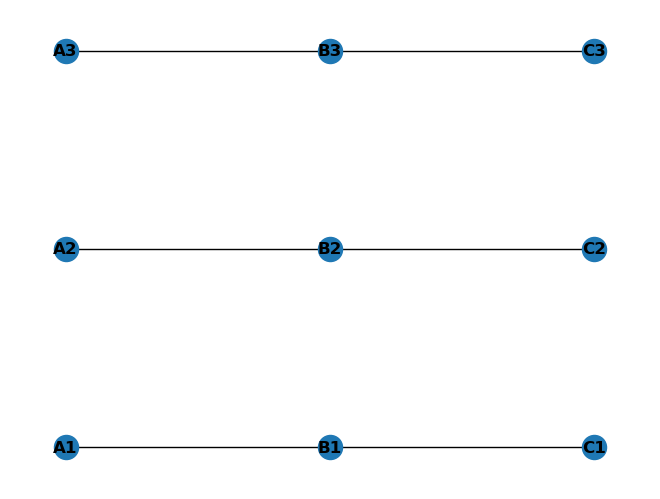

In [2]:

# Create a tripartite graph
G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'A3'], bipartite=0)  # First partition
G.add_nodes_from(['B1', 'B2', 'B3'], bipartite=1)  # Second partition
G.add_nodes_from(['C1', 'C2', 'C3'], bipartite=2)  # Third partition
G.add_edges_from([('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3')])
G.add_edges_from([('B1', 'C1'), ('B2', 'C2'), ('B3', 'C3')])

# Use bipartite layout for the first two partitions
pos = {node: (0, i) for i, node in enumerate(['A1', 'A2', 'A3'])}
pos.update({node: (1, i) for i, node in enumerate(['B1', 'B2', 'B3'])})
pos.update({node: (2, i) for i, node in enumerate(['C1', 'C2', 'C3'])})

# Draw the tripartite graph
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()